In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from matplotlib.collections import LineCollection
import scipy.spatial
from string import ascii_uppercase

In [2]:
def circumspheres(simplices, distance_matrix, X):
    assert all([ l == len(simplices[0]) for l in map(len,simplices) ])
    
    cayley_menger = np.zeros((len(simplices), len(simplices[0]) + 1, len(simplices[0]) + 1))
    cayley_menger[:,1:,0] = 1
    cayley_menger[:,0,1:] = 1
    cayley_menger[:,0,0]  = 0
    
    circumradii = np.zeros((len(simplices)))
    circumcentres = np.zeros((len(simplices), X.shape[1]))
    
    for t,tau in enumerate(simplices):
        for i,idx in enumerate(tau):
            for j,jdx in enumerate(tau):
                cayley_menger[t, 1+i,1+j] = distance_matrix[idx,jdx]
        #
        cayley_menger[t] = np.linalg.inv(cayley_menger[t])
        circumradii[t] = np.sqrt(cayley_menger[t,0,0]/-2)
        circumcentres[t] = cayley_menger[t,1:,0].dot( X[tau,:] )
    return (circumradii, circumcentres)

In [3]:
X = np.asarray([
    [0,0],
    [2, 0],
    [1, np.sqrt(3) ],
    [1, -np.sqrt(3)],
])

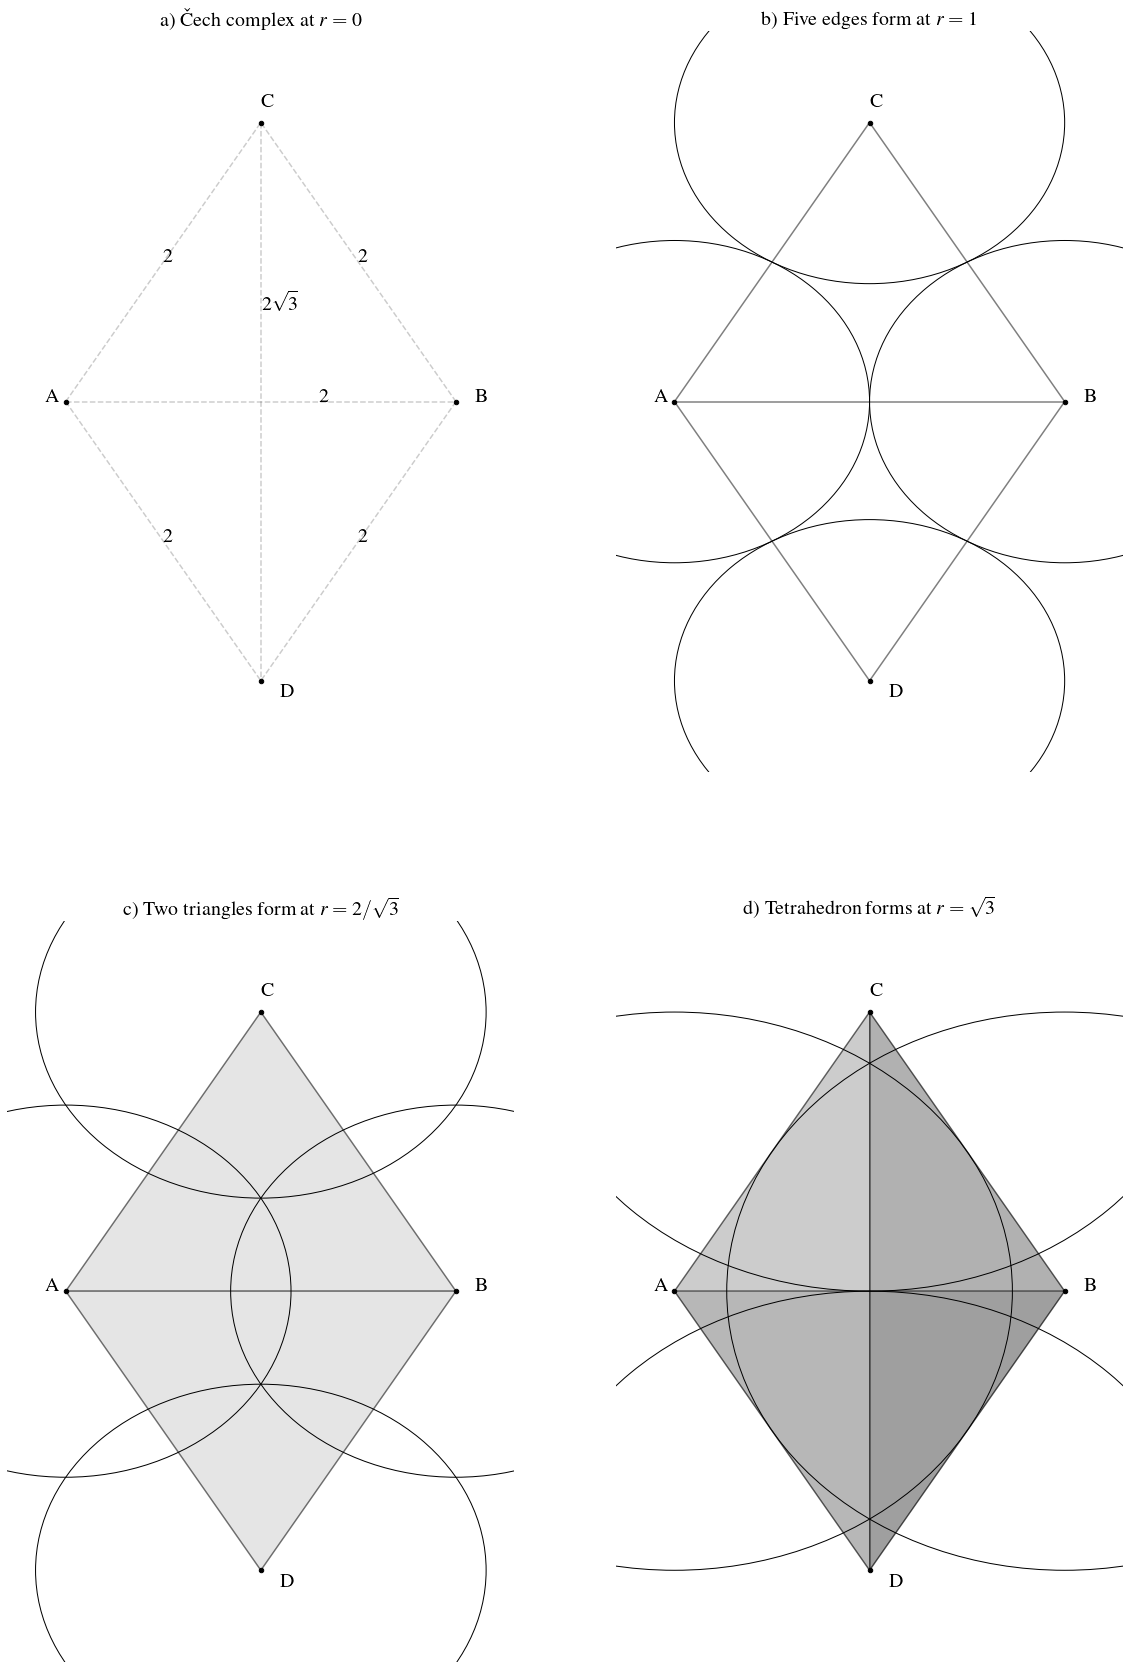

In [8]:
FONT_SIZE = 20
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(221)
ax.scatter(X[:,0], X[:,1], color = "black", s= FONT_SIZE)

off = .1
node_labels_offset = np.asarray([[-off-0.005,0],[off,0],[0,off],[off,-off]])
for i, p in enumerate(X):
    ax.text(*tuple(p +node_labels_offset[i]), ascii_uppercase[i], fontsize = FONT_SIZE)

lines = list(combinations(list(range(4)), 2))
v_lines = X[lines, :]
line_segments = LineCollection(v_lines, linestyle='--', color = "black", alpha = .2)
ax.add_collection(line_segments)

_, cc = circumspheres(lines, scipy.spatial.distance_matrix(X,X), X)

for i, c in enumerate(cc):
    if not np.array_equal(c,[1, 0]):
        ax.text(*tuple(c), str(2), fontsize = FONT_SIZE)


ax.axis("off")
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times"
})

ax.set_xlim(-0.3,2.3)
ax.set_ylim(-2.3,2.3)
ax.text(*tuple([1.004,np.sqrt(3)/3]), str("$$2\sqrt{3}$$"), fontsize = FONT_SIZE)
ax.text(*tuple([1.3,0]), str("2"), fontsize = FONT_SIZE)
ax.set_title("a) Čech complex at $r=0$", fontsize = FONT_SIZE)

#---- cech complex at radius 1
ax = fig.add_subplot(222)
ax.scatter(X[:,0], X[:,1], color = "black", s= FONT_SIZE)
ax.axis("off")
for i, p in enumerate(X):
    ax.text(*tuple(p +node_labels_offset[i]), ascii_uppercase[i], fontsize = FONT_SIZE)
    circle = plt.Circle(tuple(p), 1, color = "black", fill = False)
    ax.add_patch(circle)

lines = list(combinations(list(range(4)), 2))
lines = [l for l in lines if tuple(sorted(l)) != (2,3)]
v_lines = X[lines, :]
line_segments = LineCollection(v_lines, linestyle='solid', color = "black", alpha = .5)
ax.add_collection(line_segments)
ax.set_xlim(-0.3,2.3)
ax.set_ylim(-2.3,2.3)
ax.set_title("b) Five edges form at $r=1$", fontsize = FONT_SIZE)

#---- cech complex at radius 2/sqrt(3)
ax = fig.add_subplot(223)
ax.scatter(X[:,0], X[:,1], color = "black", s= FONT_SIZE)
ax.axis("off")
for i, p in enumerate(X):
    ax.text(*tuple(p +node_labels_offset[i]), ascii_uppercase[i], fontsize = FONT_SIZE)
    circle = plt.Circle(tuple(p), (2/np.sqrt(3)), color = "black", fill = False)
    ax.add_patch(circle)

lines = list(combinations(list(range(4)), 2))
lines = [l for l in lines if tuple(sorted(l)) != (2,3)]
triangles = [(0,1,2),(0,1,3)]
v_lines = X[lines, :]
v_tris = X[triangles, :]

line_segments = LineCollection(v_lines, linestyle='solid', color = "black", alpha = .5)
ax.add_collection(line_segments)
ax.set_xlim(-0.3,2.3)
ax.set_ylim(-2.3,2.3)

for tri in v_tris:
    ax.fill(tri[:,0], tri[:,1], color = "black", alpha = .1)
    
ax.set_title("c) Two triangles form at $r=2/\sqrt{3}$", fontsize = FONT_SIZE)

#---- cech complex at radius sqrt(3)
ax = fig.add_subplot(224)
ax.scatter(X[:,0], X[:,1], color = "black", s= FONT_SIZE)
ax.axis("off")
for i, p in enumerate(X):
    ax.text(*tuple(p +node_labels_offset[i]), ascii_uppercase[i], fontsize = FONT_SIZE)
    circle = plt.Circle(tuple(p), np.sqrt(3), color = "black", fill = False)
    ax.add_patch(circle)

lines = list(combinations(list(range(4)), 2))
triangles = list(combinations(list(range(4)), 3))

v_lines = X[lines, :]
v_tris = X[triangles, :]

for t,tri in enumerate(v_tris):
    ax.fill(tri[:,0], tri[:,1], color = "black", alpha = .1*t)

line_segments = LineCollection(v_lines, linestyle='solid', color = "black", alpha = .5)
ax.add_collection(line_segments)
ax.set_xlim(-0.3,2.3)
ax.set_ylim(-2.3,2.3)
ax.set_title("d) Tetrahedron forms at $r=\sqrt{3}$", fontsize = FONT_SIZE)
plt.show()


In [9]:
fig.savefig("cech.pdf", bbox_inches='tight')
plt.show()